In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load the data

In [18]:
eth_ticker_raw = pd.read_csv("../data/ticker_data/USDT_ETH.csv",index_col=0)
btc_ticker_raw = pd.read_csv("../data/ticker_data/USDT_BTC.csv",index_col=0)          

In [19]:
eth_ticker_raw.dtypes

Close        float64
Timestamp      int64
High         float64
Low          float64
Open         float64
dtype: object

In [20]:
eth_ticker_raw.head()

,Close,Timestamp,High,Low,Open
0,1.75,1439014500,0.33,1.61,0.33
1,1.85,1439014800,1.85,1.85,1.85
2,1.85,1439015100,1.85,1.85,1.85
3,1.85,1439015400,1.85,1.85,1.85
4,1.85,1439015700,1.85,1.85,1.85


In [21]:
ticker_data_merged = eth_ticker_raw.set_index("Timestamp")\
                .join(
                        btc_ticker_raw.set_index("Timestamp"),
                        on="Timestamp",
                        how="inner",
                        lsuffix="_eth",
                        rsuffix="_btc")

## Prep and intervals

In [22]:
import numpy as np

# in minutes 
#minutes = 60*24*4
minutes = 60*24*7
data_point_bucket_size = str(minutes) + "T"

datetime = pd.to_datetime(ticker_data_merged.index,unit='s') 


agg_method = {'Close_eth': "last",
                "High_eth": np.max, 
                "Low_eth": np.min,
                "Open_eth": "first",
                "Close_btc": "last",
                "High_btc": np.max, 
                "Low_btc": np.min,
                "Open_btc": "first", 
                 }

ticker_data = ticker_data_merged.set_index(datetime)\
                                    .resample(data_point_bucket_size)\
                                    .agg(agg_method)

print("Shape of reshaped data: " + str(ticker_data.shape))
print("Shape of original data: " + str(ticker_data_merged.shape))

Shape of reshaped data: (150, 8)
Shape of original data: (300430, 8)


In [23]:
datetime

DatetimeIndex(['2015-08-08 06:15:00', '2015-08-08 06:20:00',
               '2015-08-08 06:25:00', '2015-08-08 06:30:00',
               '2015-08-08 06:35:00', '2015-08-08 06:40:00',
               '2015-08-08 06:45:00', '2015-08-08 06:50:00',
               '2015-08-08 06:55:00', '2015-08-08 07:00:00',
               ...
               '2018-06-16 09:15:00', '2018-06-16 09:20:00',
               '2018-06-16 09:25:00', '2018-06-16 09:30:00',
               '2018-06-16 09:35:00', '2018-06-16 09:40:00',
               '2018-06-16 09:45:00', '2018-06-16 09:50:00',
               '2018-06-16 09:55:00', '2018-06-16 10:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=300430, freq=None)

In [24]:
ticker_data.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
Timestamp,,,,,,,,
2015-08-08,2.150000,2.150000,0.50,0.3300,265.000000,282.235975,255.000000,275.603572
2015-08-15,1.500000,2.200000,1.01,2.1500,233.130002,267.000000,174.570134,265.000000
2015-08-22,1.060000,1.500000,1.00,1.5000,230.140000,285.000000,197.574000,233.130002
2015-08-29,1.219400,1.391000,1.06,1.0600,231.000000,235.000000,211.000000,230.140000
2015-09-05,0.999899,1.373368,0.83,1.2194,238.700000,255.000000,226.542642,231.000000


# Price over time

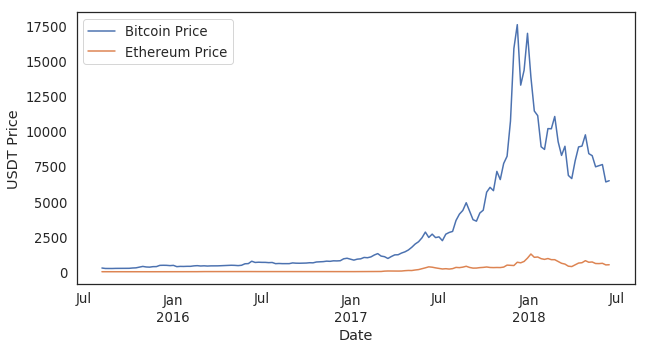

In [53]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
ax = ticker_data.plot(y=["Close_btc","Close_eth"],ax=ax)
#ax.set_title("USDT Price for Etherium and Bitcoin")
ax.set_xlabel("Date")
ax.set_ylabel("USDT Price")
ax.legend(["Bitcoin Price","Ethereum Price"])

sns.set(font_scale=1.2)
sns.set_style("white")


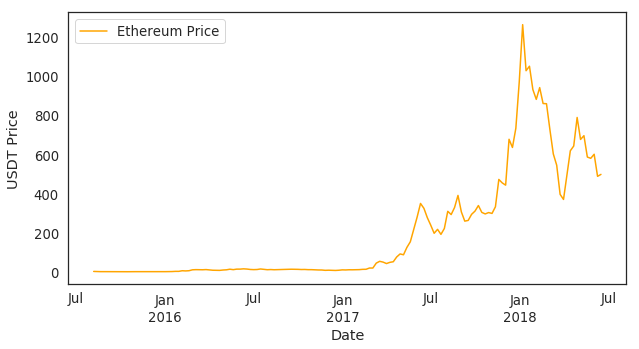

In [54]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
ax = ticker_data.plot(y=["Close_eth"],ax=ax,color='orange')
#ax.set_title("USDT Price for Etherium and Bitcoin")
ax.set_xlabel("Date")
ax.set_ylabel("USDT Price")
ax.legend(["Ethereum Price","Bitcoin Price"])

sns.set(font_scale=1.2)
sns.set_style("white")

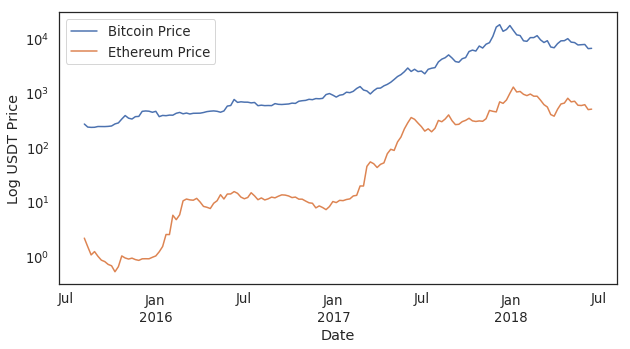

In [55]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
ax = ticker_data.plot(y=["Close_btc","Close_eth"],logy=True,ax=ax)
#ax.set_title("Log USDT Price for Etherium and Bitcoin")
ax.set_xlabel("Date")
ax.set_ylabel("Log USDT Price")
ax.legend(["Bitcoin Price","Ethereum Price"])

sns.set(font_scale=1.2)
sns.set_style("white")

# Change in closing price

In [10]:
ticker_data_change = ticker_data.copy()
ticker_data_change["prc_btc_change"] = ticker_data.Close_btc.pct_change()
ticker_data_change["prc_eth_change"] = ticker_data.Close_eth.pct_change()

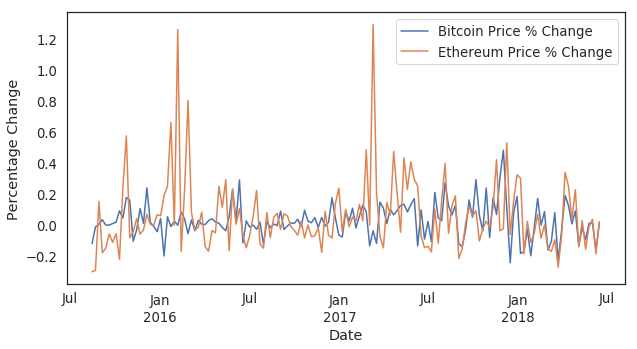

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax = ticker_data_change.plot(y=["prc_btc_change","prc_eth_change"],ax=ax)
#ax.set_title("% Price Change over 4 Day Intervals")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage Change")
ax.legend(["Bitcoin Price % Change","Ethereum Price % Change"])

sns.set(font_scale=1.2)
sns.set_style("white")

# Binary Movement

In [61]:
ticker_data_change["binary"] = 0
ticker_data_change["bin"] = "null"

logic_1 = (ticker_data_change.prc_eth_change > 0) & (ticker_data_change.prc_btc_change > 0)

logic_2 = (ticker_data_change.prc_eth_change < 0) & (ticker_data_change.prc_btc_change < 0)

logic_3 = (ticker_data_change.prc_eth_change == 0) & (ticker_data_change.prc_btc_change == 0)

logic_4 = (ticker_data_change.prc_eth_change < 0) & (ticker_data_change.prc_btc_change > 0)

logic_5 = (ticker_data_change.prc_eth_change > 0) & (ticker_data_change.prc_btc_change < 0)

logic_6 = (ticker_data_change.prc_eth_change == 0) & (ticker_data_change.prc_btc_change > 0)

logic_7 = (ticker_data_change.prc_eth_change > 0) & (ticker_data_change.prc_btc_change == 0)



ticker_data_change.binary[logic_1] = 1
ticker_data_change.bin[logic_1] = "both increasing"

ticker_data_change.binary[logic_2] = 1
ticker_data_change.bin[logic_2] = "both decreasing"


ticker_data_change.binary[logic_3] = 1
ticker_data_change.bin[logic_3] = "both stay the same"


ticker_data_change.binary[logic_4] = 1
ticker_data_change.bin[logic_4] = "eth decreasing \n & btc increasing"

ticker_data_change.binary[logic_5] = 1
ticker_data_change.bin[logic_5] = "eth increasing \n & btc decreasing"

ticker_data_change.binary[logic_6] = 1
ticker_data_change.bin[logic_6] = "only btc increasing"

ticker_data_change.binary[logic_7] = 1
ticker_data_change.bin[logic_7] = "only eth increasing"




/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.p

In [62]:
x = ticker_data_change[["binary","bin"]][ticker_data_change.bin != "null"].groupby(['bin']).sum()

In [63]:
xx = pd.DataFrame([["only btc \n increasing", 0], ["only eth \n increasing", 0]], 
             columns=['bin','binary']
            ).set_index("bin")

x = x.append(xx)

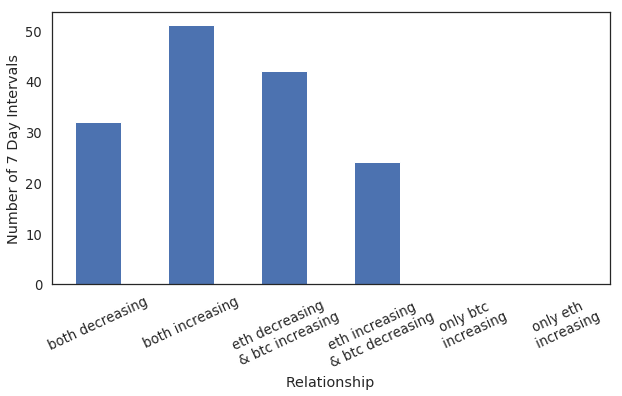

In [71]:
%matplotlib inline

import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10,5))

ax = x.plot(y=["binary"],kind="bar",figsize=(10,5),rot=0,ax=ax)
#ax.set_title("% Price Change over 4 Day Intervals")
ax.set_xlabel("Relationship")
ax.set_ylabel("Number of 7 Day Intervals")
ax.legend(["count"])
ax.legend().set_visible(False)
sns.set(font_scale=1.2)
plt.xticks(rotation=25)
sns.set_style("white")

